# DSCI 100-Group Project : Predicting Type 2 Diabetes
Bhavya Mohan, Jason Jonathan, Sherin X, Neha Menon

Introduction: 


Methods/Results:

Discussion:

In [24]:
# Loading Packages ----
library(ggplot2)
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(kknn)
library(gridExtra)

In [25]:
# Load data ----

## CLASS refers to diabetes where n is no diabetes, y is diabetic, and p is poteintially diabetic

url <- "https://raw.githubusercontent.com/jasonj17/DSCI100Project/main/Dataset%20of%20Diabetes%20.csv"
diabetes <- read_csv(url)|>
                mutate(CLASS = as_factor(CLASS))

diabetes # calling the dataset for viewing
### Data is already in Tidy Format but is unscaled

Rows: 1000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Gender, CLASS
dbl (12): ID, No_Pation, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23,N
420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21,N
634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21,N
721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24,N
421,34227,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24,N
670,34229,M,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21,N


In [26]:
### Lets first look at the number of observations in each class
num_obs <- nrow(diabetes)

diabetes_summary <- diabetes |>
  group_by(CLASS)|>
  summarise(count=n(),
           percentage = n()/num_obs*100)
diabetes_summary

CLASS,count,percentage
<fct>,<int>,<dbl>
N,103,10.3
P,53,5.3
Y,844,84.4


In [27]:
### Mean Values for variables
mean_predictors <- diabetes|>
summarize(across(AGE:BMI, mean))
mean_predictors

AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53.528,5.124743,68.943,8.28116,4.86282,2.34961,1.20475,2.60979,1.8547,29.57802


In [28]:
### Number of empty data points
number_empty <- diabetes |>
  is.na()|>
    sum()
number_empty

[1] 0

In [29]:
### Scaling the data
uc_recipe <- recipe(CLASS ~ AGE + Urea + Cr + HbA1c + Chol + TG + HDL + LDL + VLDL + BMI, data = diabetes)

uc_recipe <- uc_recipe |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
uc_recipe

scaled_diabetes <- bake(uc_recipe, diabetes)
scaled_diabetes

Recipe

Inputs:

      role #variables
   outcome          1
 predictor         10

Training data contained 1000 data points and no missing data.

Operations:

Scaling for AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL,... [trained]
Centering for AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL,... [trained]

AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.4009437,-0.14470837,-0.38248056,-1.334316,-0.50918099,-1.0345667,1.809850757,-1.08491445,-0.3697730,-1.124060,N
-3.1284516,-0.21284763,-0.11574609,-1.334316,-0.89328300,-0.6777236,-0.158612731,-0.45716904,-0.3424774,-1.325575,N
-0.4009437,-0.14470837,-0.38248056,-1.334316,-0.50918099,-1.0345667,1.809850757,-1.08491445,-0.3697730,-1.124060,N
-0.4009437,-0.14470837,-0.38248056,-1.334316,-0.50918099,-1.0345667,1.809850757,-1.08491445,-0.3697730,-1.124060,N
-2.3329285,0.67296275,-0.38248056,-1.334316,0.02856183,-0.9631980,-0.612873536,-0.54684696,-0.3970685,-1.728607,N
-0.9691745,-0.96237948,-0.74924046,-1.689485,-1.50784622,-0.9631980,-0.310032999,-0.99523654,-0.3970685,-1.728607,N
-0.4009437,-1.06458837,-0.31579695,-1.689485,-0.97010341,-0.7490922,-0.461453268,-0.45716904,-0.3424774,-1.124060,N
-0.6282360,-0.14470837,-0.36580966,-1.689485,-1.50784622,-1.1059353,-0.461453268,-0.90555862,-0.3970685,-1.124060,N
-1.1964668,-0.86017059,-0.03239157,-1.689485,-0.81646260,-1.0345667,1.809850757,0.97767760,-0.2332952,-1.728607,N


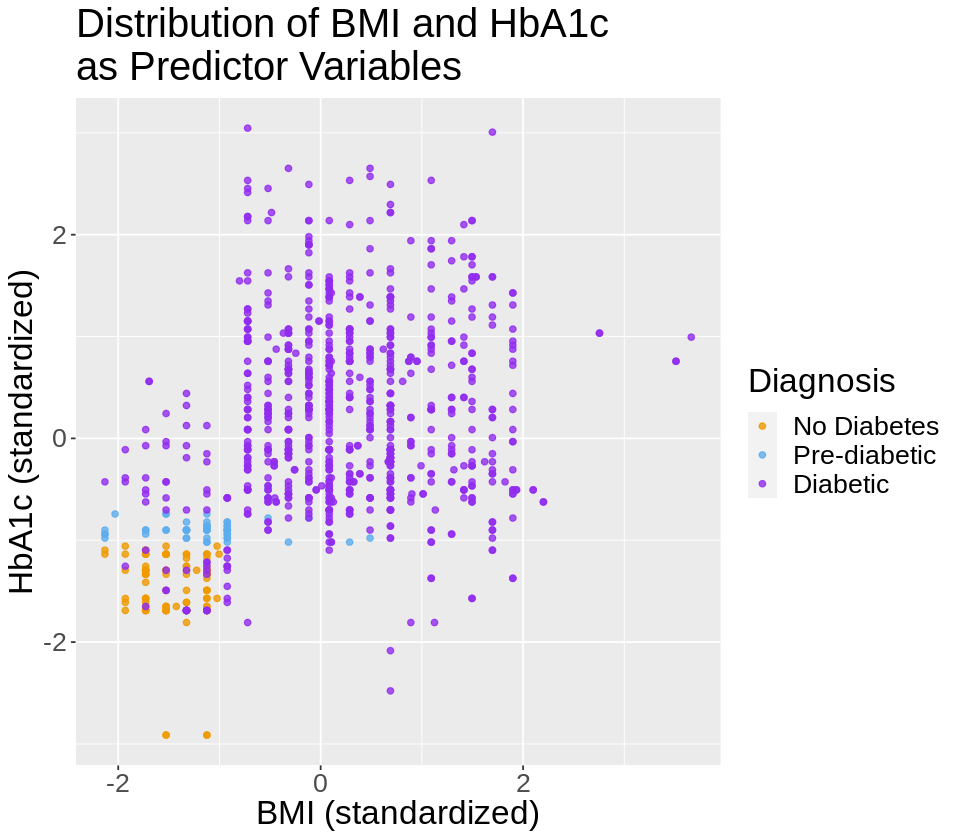

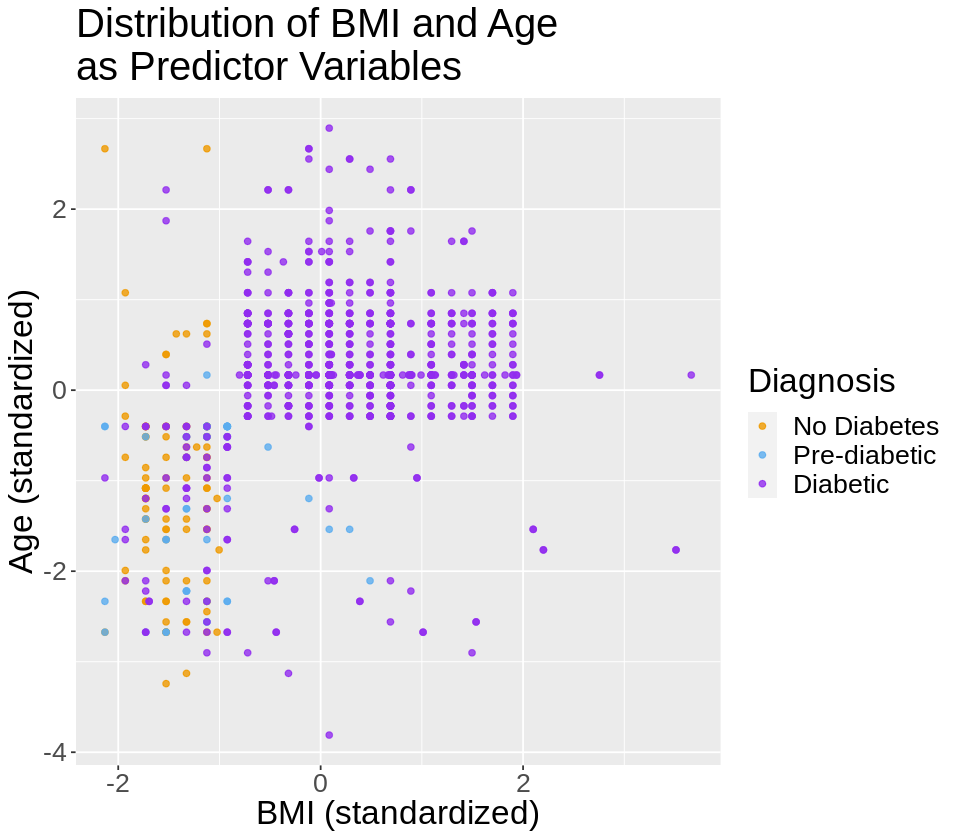

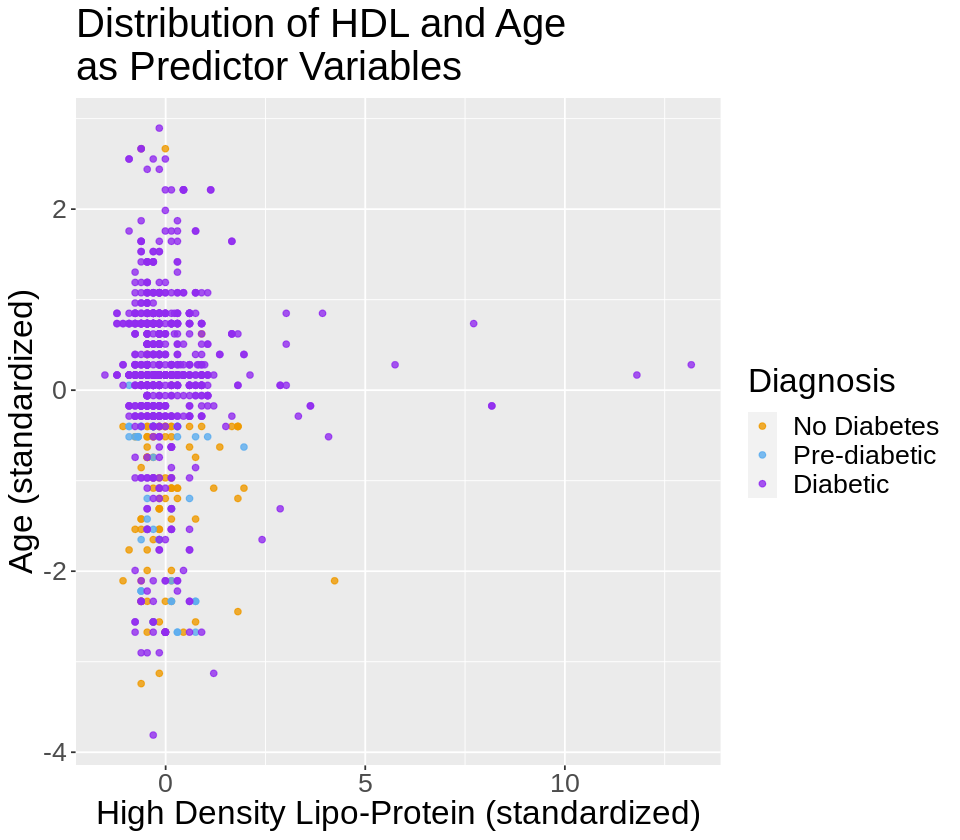

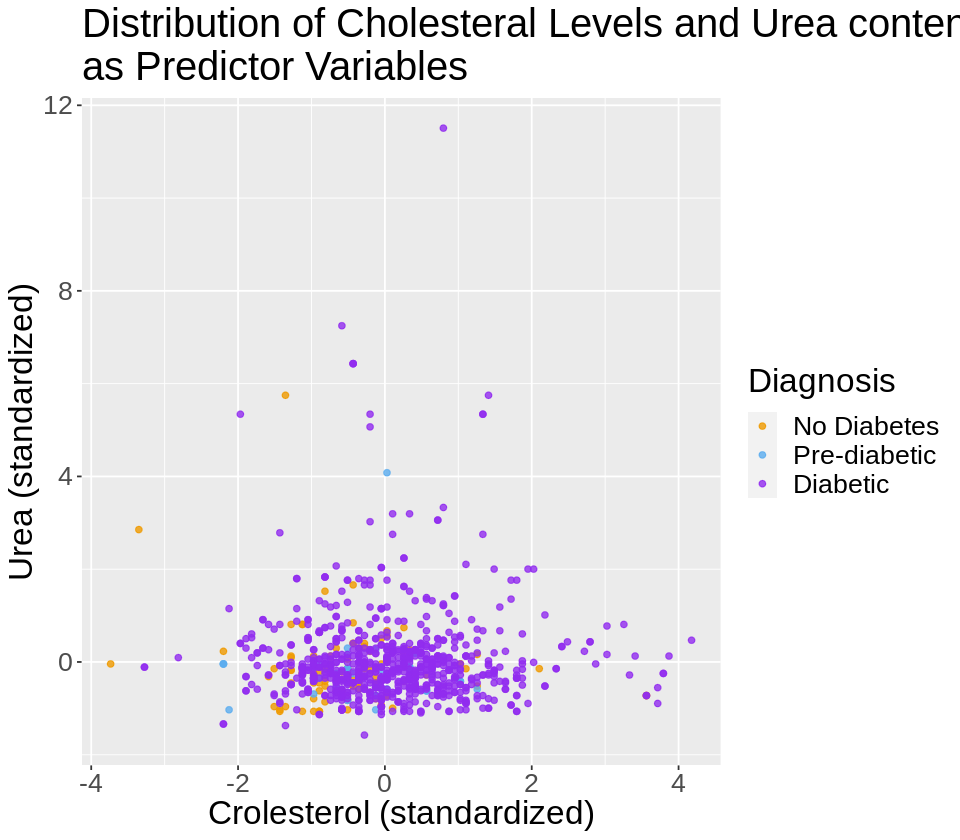

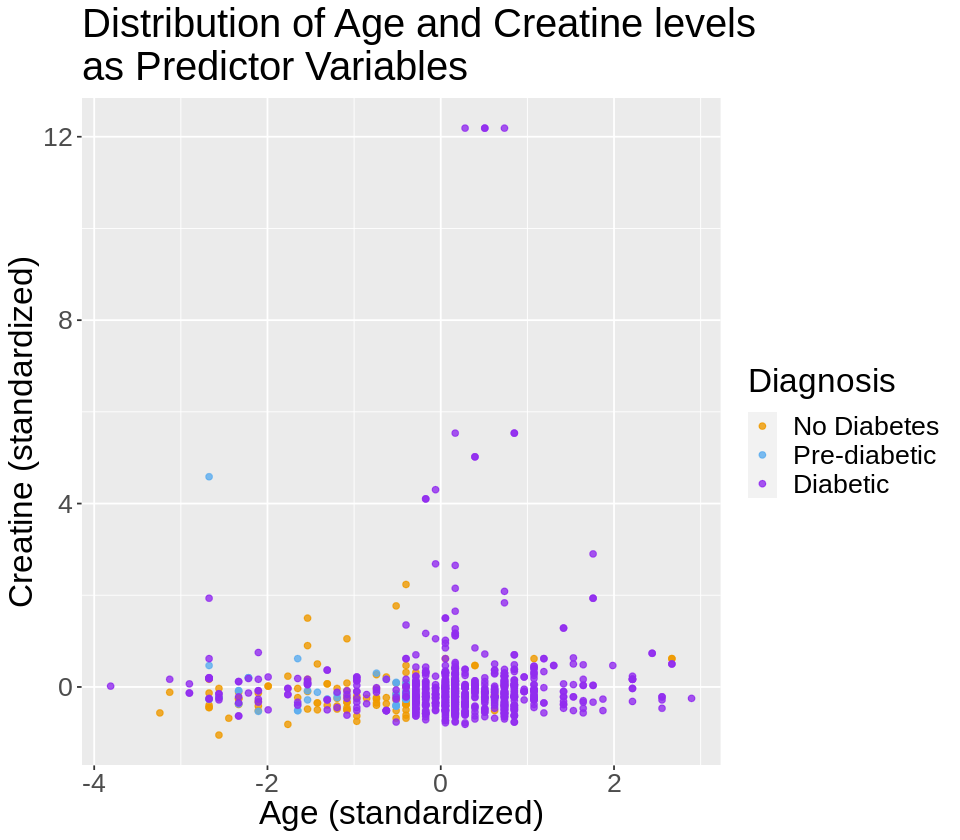

In [30]:
# Initial Graphs of different correlations----

options(repr.plot.width = 8, repr.plot.height = 7)

graph1 <- scaled_diabetes |>
    ggplot(aes(x = BMI, y = HbA1c, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "BMI (standardized)", y = "HbA1c (standardized)", color = "Diagnosis") +
    scale_color_manual(labels = c("No Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of BMI and HbA1c \nas Predictor Variables')

graph2 <- scaled_diabetes |>
    ggplot(aes(x = BMI, y = AGE, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "BMI (standardized)", y = "Age (standardized)", color = "Diagnosis") +
    scale_color_manual(labels = c("No Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of BMI and Age \nas Predictor Variables')

graph3 <- scaled_diabetes |>
    ggplot(aes(x = HDL, y = AGE, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "High Density Lipo-Protein (standardized)", y = "Age (standardized)", color = "Diagnosis") +
    scale_color_manual(labels = c("No Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of HDL and Age \nas Predictor Variables')

graph4 <- scaled_diabetes |>
    ggplot(aes(x = Chol, y = Urea, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "Crolesterol (standardized)", y = "Urea (standardized)", color = "Diagnosis") +
    scale_color_manual(labels = c("No Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of Cholesteral Levels and Urea content \nas Predictor Variables')

graph5 <- scaled_diabetes |>
    ggplot(aes(x = AGE, y = Cr, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "Age (standardized)", y = "Creatine (standardized)", color = "Diagnosis") +
    scale_color_manual(labels = c("No Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of Age and Creatine levels \nas Predictor Variables')


graph1
graph2
graph3
graph4
graph5

### **Methods:**

In the diabetes dataset, we will be using the columns, HBa1c and BMI for the analysis. We chose BMI as it is a standardized method to indicate an individuals health, in addition, the HBa1c was chosen as it shows an individuals average blood sugar over the last three months. Both of these serve as good indicators to predict if an individual is at risk for diabetes, pre-diabetic or diabetic. Based on the plots above, HBa1c and BMI have the most clear distribution in the plot and may provide the best classifier for the required analysis. 

One way of visualizing the results is by using different colors to represent three classifiers: diabetic, non-diabetic and pre-diabetic in a scatter plot. If the prediction matches the actual result, we’ll use one color to represent the points and if the prediction is false, another color will be used. To show how accurate our classifier is, we will compute its accuracy of prediction and construct a confusion matrix for our classifier which shows a table of predicted labels and correct labels.

### **Expected outcomes and significance:**

**What do you expect to find?**

It is expected that a model to predict diabetes based on diagnostic measurements such as blood glucose levels and BMI will be made. We expect the model to predict whether a patient has diabetes with sufficient accuracy. Additionally, it is expected that both BMI and HbA1c will have a poitive correlation with diabetes. 

**What impact could such findings have?**

This model could help individuals at home predict their risk for diabetes and poteintially take corrective measures. For example, if the model predicts that an individual has diabetes, then that individual would be be able to consult their doctor to properly diagnose and treat the disease.

**What future questions could this lead to?**

Developing this model to predict diabetes, may lead to further classifications to predict type 1 vs type 2 diabetes. Additionally, the model may allow us to further understand how the classifiers BMI and HbA1c relate to diabetes.

In [31]:
#### Setting the seed
set.seed(1035)

# Creating training and testing splits
diabetes_split <- initial_split(scaled_diabetes, prop = 0.75, strata = CLASS)  
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)
glimpse(diabetes_test)

Rows: 749
Columns: 11
$ AGE   <dbl> -0.4009437, -0.4009437, -0.4009437, -2.3329285, -0.4009437, -2.4…
$ Urea  <dbl> -0.14470837, -0.14470837, -0.14470837, 0.67296275, -1.06458837, …
$ Cr    <dbl> -0.38248056, -0.38248056, -0.38248056, -0.38248056, -0.31579695,…
$ HbA1c <dbl> -1.334316, -1.334316, -1.334316, -1.334316, -1.689485, -1.689485…
$ Chol  <dbl> -0.50918099, -0.50918099, -0.50918099, 0.02856183, -0.97010341, …
$ TG    <dbl> -1.0345667, -1.0345667, -1.0345667, -0.9631980, -0.7490922, -0.2…
$ HDL   <dbl> 1.809850757, 1.809850757, 1.809850757, -0.612873536, -0.46145326…
$ LDL   <dbl> -1.08491445, -1.08491445, -1.08491445, -0.54684696, -0.45716904,…
$ VLDL  <dbl> -0.3697730, -0.3697730, -0.3697730, -0.3970685, -0.3424774, -0.2…
$ BMI   <dbl> -1.124060, -1.124060, -1.124060, -1.728607, -1.124060, -1.124060…
$ CLASS <fct> N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N…
Rows: 251
Columns: 11
$ AGE   <dbl> -3.1284516, -0.9691745, -0.6282360, -1.1964668, -2.5602208, -2

In [32]:
# Making sure that our class proportions were roughly preserved when we split the data
diabetes_proportions <- diabetes_train |>
                            group_by(CLASS) |>
                            summarize(n = n()) |>
                            mutate(percent = 100*n/nrow(diabetes_train))

diabetes_proportions

CLASS,n,percent
<fct>,<int>,<dbl>
N,75,10.013351
P,40,5.340454
Y,634,84.646195


In [33]:
# Creating recipe with our chosen predictor variables
diabetes_recipe <- recipe(CLASS ~ BMI + HbA1c, data = diabetes_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

In [34]:
# Choosing an appropriate value for K
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

diabetes_vfold <- vfold_cv(diabetes_train, v = 10, strata = CLASS)

knn_results <- workflow() |>
                add_recipe(diabetes_recipe) |>
                add_model(knn_tune) |>
                tune_grid(resamples = diabetes_vfold, grid = k_vals) |>
                collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9545756,10,0.005373873,Preprocessor1_Model01
1,roc_auc,hand_till,0.9186281,10,0.015471644,Preprocessor1_Model01
2,accuracy,multiclass,0.9545936,10,0.004547020,Preprocessor1_Model02
2,roc_auc,hand_till,0.9329415,10,0.015752633,Preprocessor1_Model02
3,accuracy,multiclass,0.9519094,10,0.006033412,Preprocessor1_Model03
3,roc_auc,hand_till,0.9373386,10,0.013413812,Preprocessor1_Model03
4,accuracy,multiclass,0.9532428,10,0.005716275,Preprocessor1_Model04
4,roc_auc,hand_till,0.9606667,10,0.011592744,Preprocessor1_Model04
5,accuracy,multiclass,0.9452608,10,0.009204397,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9545756,10,0.005373873,Preprocessor1_Model01
2,accuracy,multiclass,0.9545936,10,0.004547020,Preprocessor1_Model02
3,accuracy,multiclass,0.9519094,10,0.006033412,Preprocessor1_Model03
4,accuracy,multiclass,0.9532428,10,0.005716275,Preprocessor1_Model04
5,accuracy,multiclass,0.9452608,10,0.009204397,Preprocessor1_Model05
6,accuracy,multiclass,0.9452428,10,0.008076655,Preprocessor1_Model06
7,accuracy,multiclass,0.9492428,10,0.008166735,Preprocessor1_Model07
8,accuracy,multiclass,0.9492428,10,0.008166735,Preprocessor1_Model08
9,accuracy,multiclass,0.9519275,10,0.007495760,Preprocessor1_Model09


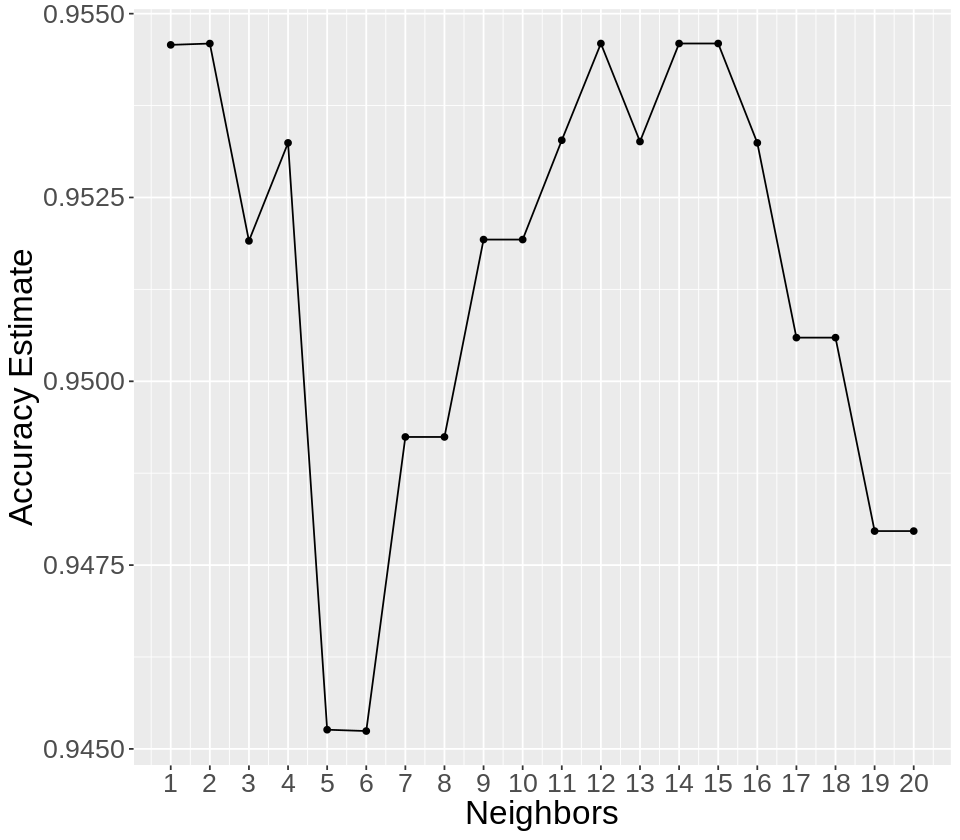

In [35]:
accuracies <- knn_results |> 
                filter(.metric == "accuracy")
accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Accuracy Estimate") +
                    scale_x_continuous(breaks = seq(0, 20, by = 1)) +
                    theme(text = element_text(size = 20))
accuracy_vs_k

In [36]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
                    set_engine("kknn") |>
                    set_mode("classification")
knn_best_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 12
  weight_func = rectangular

Computational engine: kknn 


In [37]:
diabetes_best_fit <- workflow() |>
                add_recipe(diabetes_recipe) |>
                add_model(knn_best_spec) |>
                fit(data = diabetes_train)
diabetes_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04806409
Best kernel: rectangular
Best k: 12

In [38]:
diabetes_test_predictions <- predict(diabetes_best_fit, diabetes_test) |> 
                                bind_cols(diabetes_test)
diabetes_test_predictions

.pred_class,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
N,-3.1284516,-0.21284763,-0.1157460905,-1.3343156,-0.89328300,-0.6777236,-0.158612731,-0.457169044,-0.34247741,-1.325575,N
N,-0.9691745,-0.96237948,-0.7492404644,-1.6894849,-1.50784622,-0.9631980,-0.310032999,-0.995236535,-0.39706853,-1.728607,N
N,-0.6282360,-0.14470837,-0.3658096591,-1.6894849,-1.50784622,-1.1059353,-0.461453268,-0.905558620,-0.39706853,-1.124060,N
N,-1.1964668,-0.86017059,-0.0323915676,-1.6894849,-0.81646260,-1.0345667,1.809850757,0.977677600,-0.23329516,-1.728607,N
N,-2.5602208,-0.24691726,-0.2324424225,-1.6105584,-0.97010341,-1.1773039,0.749908879,-0.905558620,-0.42436409,-1.325575,N
N,-2.6738670,-0.72389207,-0.4491641820,-1.6500216,0.02856183,-0.7490922,-0.007192463,0.529288023,-0.36977297,-1.527091,N
N,-0.9691745,-0.17877800,-0.2491133271,-1.2553891,-0.50918099,-0.4636177,-0.007192463,-0.367491129,-0.28788629,-1.325575,N
N,-0.4009437,-0.55354393,-0.4991768957,-1.6894849,-0.66282180,-0.6063549,-0.007192463,-0.367491129,-0.31518185,-1.124060,N
N,-0.4009437,0.26412719,-0.2657842317,-1.1369994,0.33584344,-1.1059353,-0.158612731,1.336389260,-0.42436409,-1.728607,N


In [39]:
diabetes_accuracy <- diabetes_test_predictions |>
                        metrics(truth = CLASS, estimate = .pred_class) |> 
                        filter(.metric == "accuracy")
diabetes_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9521912


In [40]:
diabetes_confusion_matrix <- diabetes_test_predictions |> 
                                conf_mat(truth = CLASS, estimate = .pred_class)
diabetes_confusion_matrix

          Truth
Prediction   N   P   Y
         N  27   1   9
         P   0  12   1
         Y   1   0 200

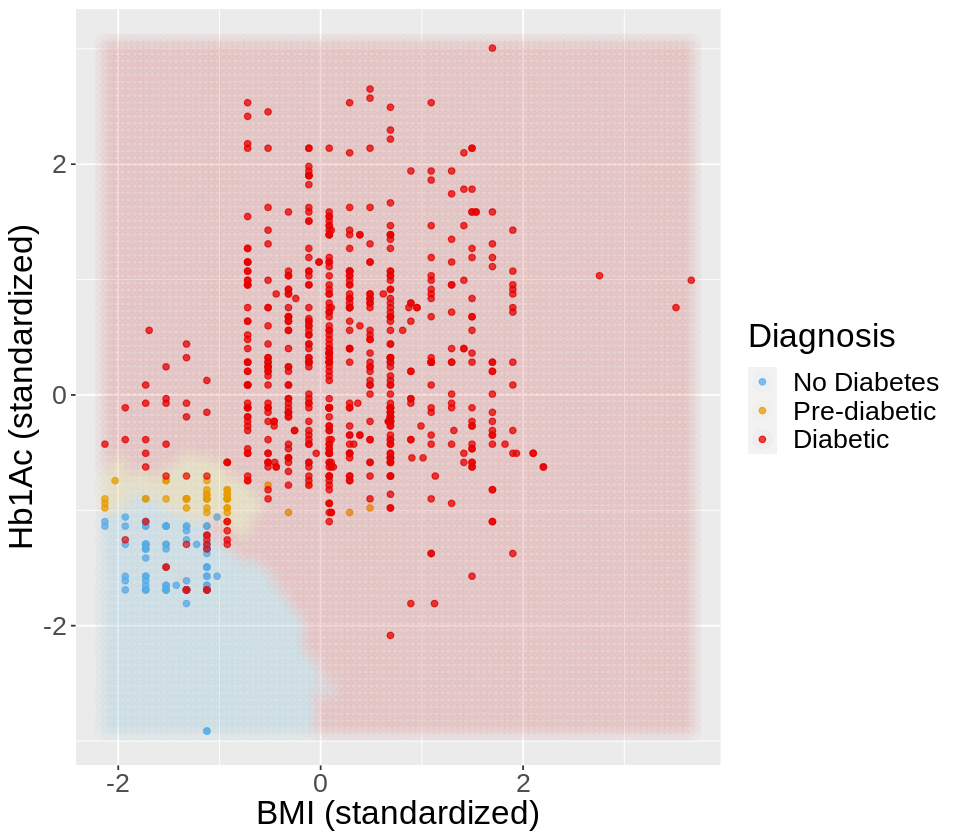

In [43]:
bmi_grid <- seq(min(scaled_diabetes$BMI), 
                max(scaled_diabetes$BMI), 
                length.out = 100)
HbA1c_grid <- seq(min(scaled_diabetes$HbA1c),
                  max(scaled_diabetes$HbA1c),
                  length.out = 100)
asgrid <- as_tibble(expand.grid(BMI = bmi_grid, 
                                HbA1c = HbA1c_grid))


# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(diabetes_best_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
                        rename(Class = .pred_class)

wkflw_plot <- ggplot() +
                geom_point(data = diabetes_train, mapping = aes(x = BMI, y = HbA1c, color = CLASS), alpha = 0.75) +
                geom_point(data = prediction_table, mapping = aes(x = BMI, y = HbA1c, color = Class), alpha = 0.02, size = 5) +
                labs(color = "Diagnosis", x = "BMI (standardized)", y = "Hb1Ac (standardized)") +
                scale_color_manual(labels = c("No Diabetes", "Pre-diabetic", "Diabetic"), values = c("steelblue2", "orange2", "red2")) +
                theme(text = element_text(size = 20))
wkflw_plot